# Lab | Customer Analysis Round 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
numerical = pd.read_csv('merged_clean_ver3_numerical.csv')
numerical.drop(['Unnamed: 0'],axis=1,inplace=True)
numerical

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,MONTH
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
9130,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
9131,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
9132,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


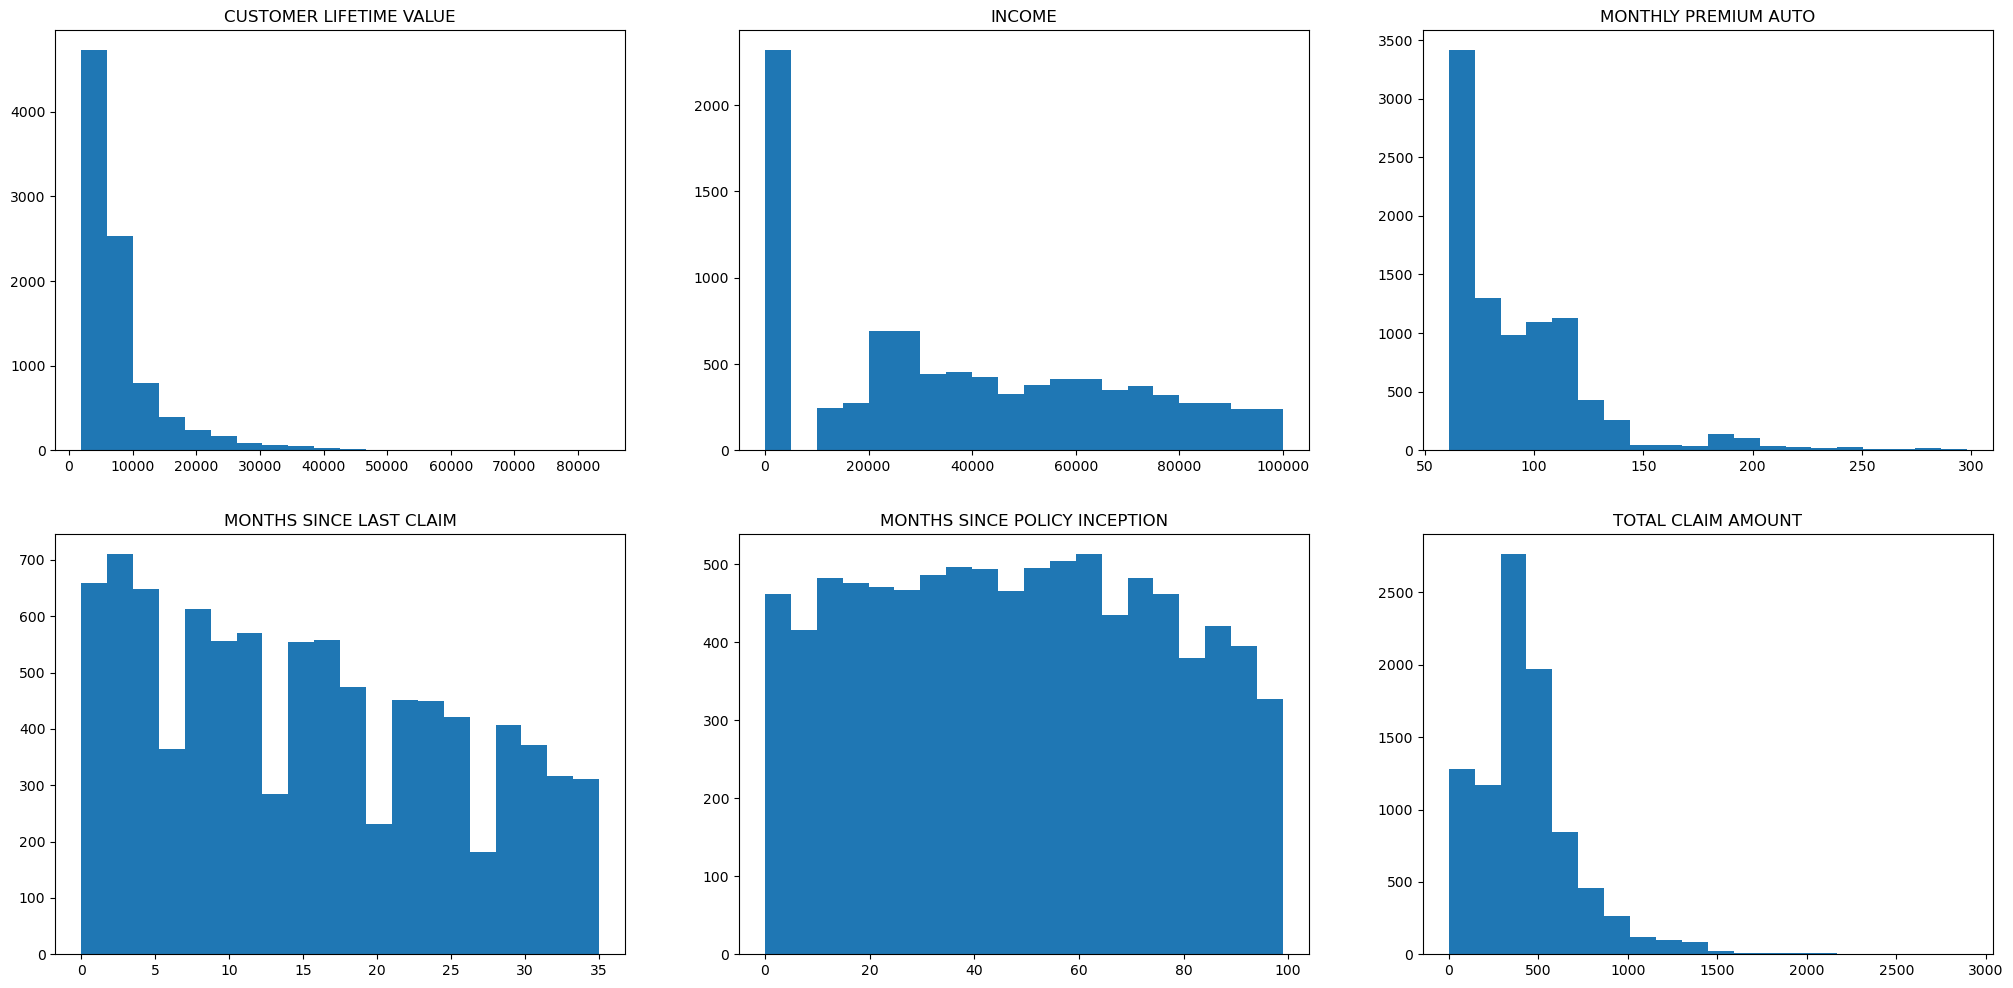

In [3]:
# Create a figure and set of axes
fig, axs = plt.subplots(2, 3, figsize=(25, 12))

# Loop through each of your columns
for i, col in enumerate(numerical[['CUSTOMER LIFETIME VALUE','INCOME','MONTHLY PREMIUM AUTO','MONTHS SINCE LAST CLAIM','MONTHS SINCE POLICY INCEPTION','TOTAL CLAIM AMOUNT']]):
    
    # Select the appropriate axes
    ax = axs[i//3, i%3]
    
    # Plot a histogram
    ax.hist(numerical[col], bins=20)
    
    # Add a title
    ax.set_title(col)

# Show the plot
plt.show()

1- x,y

2- normalise x

3- x train x test

### X-y 

In [4]:
X=numerical.drop(["TOTAL CLAIM AMOUNT"],axis=1)
Y=numerical["TOTAL CLAIM AMOUNT"]
Y

0       292.800000
1       744.924331
2       480.000000
3       484.013411
4       287.556107
           ...    
9129    355.200000
9130    897.600000
9131    273.018929
9132    381.306996
9133    618.288849
Name: TOTAL CLAIM AMOUNT, Length: 9134, dtype: float64

# CUSTOMER LIFETIME VALUE

### Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder

X['CUSTOMER LIFETIME VALUE_TEMP'] = LabelEncoder().fit(X['CUSTOMER LIFETIME VALUE']).transform(X['CUSTOMER LIFETIME VALUE'])
X.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,MONTH,CUSTOMER LIFETIME VALUE_TEMP
0,4809.216960,48029,61,7.0,52,0.0,9,2,2755
1,2228.525238,0,64,3.0,26,0.0,1,1,78
2,14947.917300,22139,100,34.0,31,0.0,2,2,7171
3,22332.439460,49078,97,10.0,3,0.0,2,1,7660
4,5035.035257,37405,63,8.0,99,3.0,4,2,3078


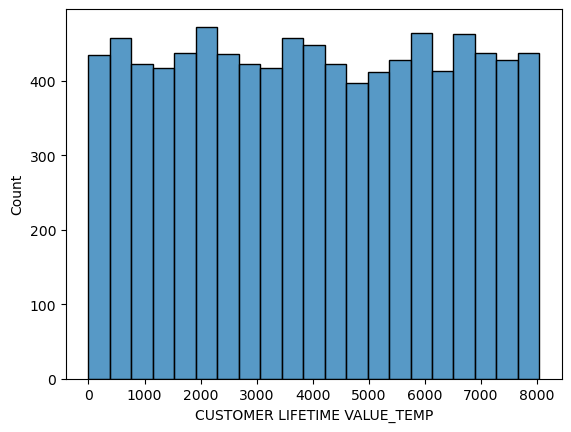

In [6]:
sns.histplot(X['CUSTOMER LIFETIME VALUE_TEMP'])
plt.show()

### .boxcox

In [7]:
arr, lmbda = stats.boxcox(X['CUSTOMER LIFETIME VALUE'])
sns.histplot(arr)
plt.show()

NameError: name 'stats' is not defined

# INCOME

### .boxcox

In [ ]:
X["INCOME_TEMP"]=np.where(X["INCOME"]<0,0,X["INCOME"])
X["INCOME_TEMP"]=X["INCOME_TEMP"].replace(0,X["INCOME"].mean())

arr, lmbda=stats.boxcox(X["INCOME_TEMP"])
sns.histplot(arr)
plt.show()

# MONTHLY PREMIUM AUTO

In [ ]:
arr, lmbda=stats.boxcox(X["MONTHLY PREMIUM AUTO"])
sns.histplot(arr)
plt.show()

# MONTHS SINCE LAST CLAIM

In [ ]:
X["MONTHS SINCE LAST CLAIM_TEMP"]=np.where(X["MONTHS SINCE LAST CLAIM"]<0,0,X["MONTHS SINCE LAST CLAIM"])
X["MONTHS SINCE LAST CLAIM_TEMP"]=X["MONTHS SINCE LAST CLAIM_TEMP"].replace(0,X["MONTHS SINCE LAST CLAIM"].mean())

arr, lmbda=stats.boxcox(X["MONTHS SINCE LAST CLAIM_TEMP"])
sns.histplot(arr)
plt.show()

# MONTHS SINCE POLICY INCEPTION

In [ ]:
X["MONTHS SINCE POLICY INCEPTION_TEMP"]=np.where(X["MONTHS SINCE POLICY INCEPTION"]<0,0,X["MONTHS SINCE POLICY INCEPTION"])
X["MONTHS SINCE POLICY INCEPTION_TEMP"]=X["MONTHS SINCE POLICY INCEPTION_TEMP"].replace(0,X["MONTHS SINCE POLICY INCEPTION"].mean())

arr, lmbda=stats.boxcox(X["MONTHS SINCE POLICY INCEPTION_TEMP"])
sns.histplot(arr)
plt.show()

## X Train X Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [ ]:
len(X)

In [ ]:
len(X_test)

In [ ]:
import statsmodels.api as nm
import statsmodels.api as sm

In [ ]:
model = sm.OLS(Y_train,X_train).fit()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test,predictions)

In [9]:
X.to_csv('X_final_data.csv')

In [10]:
Y.to_csv('Y_final_data.csv')